<a href="https://colab.research.google.com/github/CrisztinaZudor/Outlier-Detection/blob/main/OutlierDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outlier Detection



### This project evaluates three key methods: Empirical Covariance, Robust Covariance (MCD), and One-Class Support Vector Machine (OCSVM), using the Wine dataset

Import necessary libraries for modeling and plotting:

In [20]:
from sklearn.covariance import EllipticEnvelope
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import OneClassSVM
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

Create a dictionary of estimators with their specific configurations for outlier detection:

In [21]:
estimators = {
    # Empirical Covariance method - sensitive to outliers.
    # 'support_fraction=1.0' implies using all data points which can be skewed by outliers.
    # 'contamination=0.25' indicates an expected 25% of data points are outliers, based on domain knowledge.
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.2),

    # Robust Covariance (MCD) - reduces the effect of outliers by considering the smallest covariance determinant.
    # 'contamination' parameter is used for assuming 25% of data are outliers.
    "Robust Covariance (MCD)": EllipticEnvelope(contamination=0.2),

    # One-Class SVM - manage the trade-off between the boundary and the outliers.
    # 'nu=0.25' indicates the proportion of outliers in the dataset.
    # 'gamma=0.35' controls the kernel coefficient affecting the decision boundary shape.
    "OCSVM": OneClassSVM(nu=0.2, gamma=0.4),
}

# First Analysis:

Using 'ash' and 'malic_acid' variables which present a simpler, clustered distribution. <br>
This analyse demonstrates the algorithms' effectiveness in identifying outliers within structured data.<br>

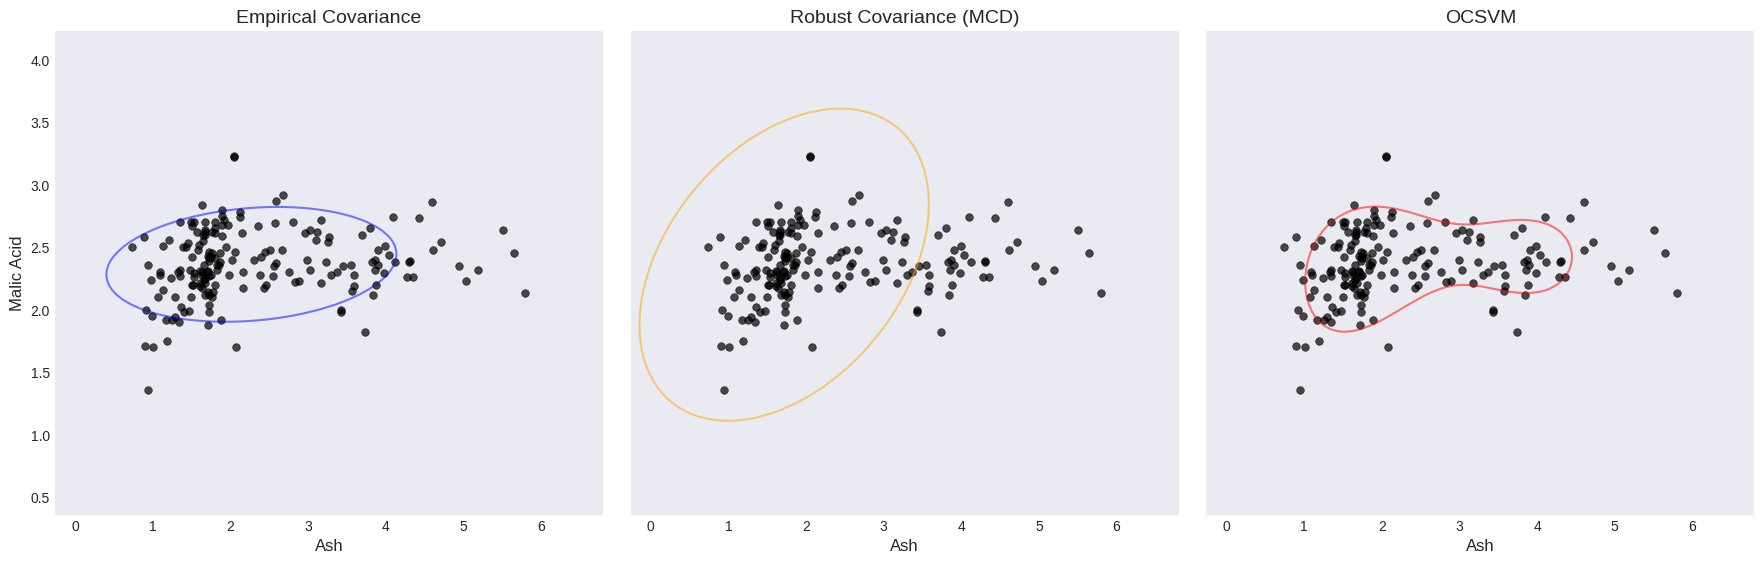

In [22]:
X = load_wine()["data"][:, [1, 2]]  # Subset of the dataset

# Applying a style from the available styles in Matplotlib
plt.style.use('seaborn-v0_8-deep')

# Create subplots for each method
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Define unique colors for different methods
colors = ["blue", "orange", "red"]

# Loop through the methods (name, estimator) and colors to train models and plot decision boundaries
for ax, (name, estimator), color in zip(axs, estimators.items(), colors):
    # Fit the current estimator to the data
    estimator.fit(X)

    # Plot the decision boundary using DecisionBoundaryDisplay
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="decision_function",
        plot_method="contour",
        levels=[0],  # Decision boundary level
        colors=color,
        ax=ax,
        alpha=0.5
    )
    # Scatter plot of the original data points with transparency
    ax.scatter(X[:, 0], X[:, 1], c='black', s=30, edgecolor='k', alpha=0.7)

    # Enhance subplot
    ax.set_title(f"{name}", fontsize=14)
    ax.set_xlabel("Ash", fontsize=12)
    if ax is axs[0]:  # Only add y label to the first subplot to avoid repetition
        ax.set_ylabel("Malic Acid", fontsize=12)

# Layout adjustments to prevent overlap and ensure clear visibility
fig.tight_layout(pad=2.0)

# Display the final plot
plt.show()

## Results:
Empirical Covariance (Blue): Influenced by outliers, leading to distorted boundaries. <br>
Robust Covariance (Orange): Successfully identifies primary clusters despite outliers.<br>
OCSVM (Red): Captures complex structures with flexible modeling.<br>

# Second Analysis:

Using 'flavanoids' and 'color_intensity' variables which present a banana-shaped, non-linear distribution. <br>
This analyse tests algorithms' capability in handling complex patterns.<br>

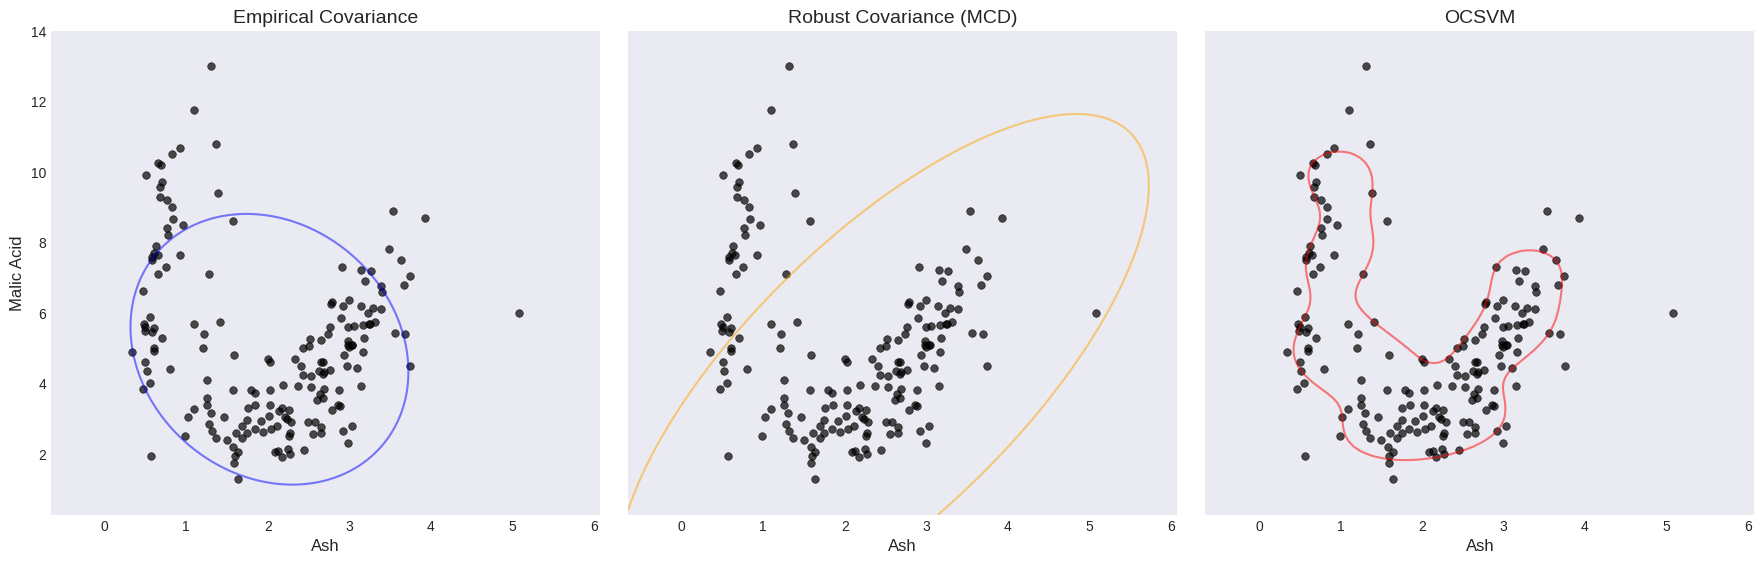

In [23]:
X = load_wine()["data"][:, [6, 9]]  # Subset of the Wine dataset for 2D analysis

# Applying a style from the available styles in Matplotlib
plt.style.use('seaborn-v0_8-deep')

# Create subplots for each method
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Define unique colors for different methods
colors = ["blue", "orange", "red"]

# Loop through the methods (name, estimator) and colors to train models and plot decision boundaries
for ax, (name, estimator), color in zip(axs, estimators.items(), colors):
    # Fit the current estimator to the data
    estimator.fit(X)

    # Plot the decision boundary using DecisionBoundaryDisplay
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="decision_function",
        plot_method="contour",
        levels=[0],  # Decision boundary level
        colors=color,
        ax=ax,
        alpha=0.5
    )
    # Scatter plot of the original data points with transparency
    ax.scatter(X[:, 0], X[:, 1], c='black', s=30, edgecolor='k', alpha=0.7)

    # Enhance subplot
    ax.set_title(f"{name}", fontsize=14)
    ax.set_xlabel("Ash", fontsize=12)
    if ax is axs[0]:  # Only add y label to the first subplot to avoid repetition
        ax.set_ylabel("Malic Acid", fontsize=12)

# Layout adjustments to prevent overlap and ensure clear visibility
fig.tight_layout(pad=2.0)

# Display the final plot
plt.show()

## Results:
Empirical Covariance (Blue): Limited adaptability, showing poor boundary fit in complex structures. <br>
Robust Covariance (Orange): Effectively identifies the main data mode but struggles with non-linear patterns.<br>
OCSVM (Red): Accurately captures banana-shaped distribution, excelling in non-linear data modeling.<br>

# Conclusion
Empirical covariance provides a foundational approach but is sensitive to outliers. <br>
Robust covariance (MCD) offers greater resilience by focusing on core data clusters.<br>
One-Class SVM excels in handling complex, non-linear patterns. <br>